In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Ensuring inline plotting for Jupyter Notebook
%matplotlib inline


# Understanding and cleaning data

In [2]:
df = pd.read_csv('/content/adult_dataset-1.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Data dict

In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
df.replace('?', np.nan, inplace=True)

# Select rows with missing values
df_1 = df[df.isnull().any(axis=1)]

df_1.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,>50K
14,51,NaN,172175,Doctorate,16,Never-married,NaN,Not-in-family,White,Male,0,2824,40,United-States,>50K
18,22,Private,119592,Assoc-acdm,12,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,2824,40,NaN,>50K


In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2399 entries, 0 to 32544
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             2399 non-null   int64 
 1   workclass       563 non-null    object
 2   fnlwgt          2399 non-null   int64 
 3   education       2399 non-null   object
 4   education.num   2399 non-null   int64 
 5   marital.status  2399 non-null   object
 6   occupation      556 non-null    object
 7   relationship    2399 non-null   object
 8   race            2399 non-null   object
 9   sex             2399 non-null   object
 10  capital.gain    2399 non-null   int64 
 11  capital.loss    2399 non-null   int64 
 12  hours.per.week  2399 non-null   int64 
 13  native.country  1816 non-null   object
 14  income          2399 non-null   object
dtypes: int64(6), object(9)
memory usage: 299.9+ KB


In [7]:
# Drop rows with any NaN values
df = df.dropna()

# Print the updated DataFrame
print(df.head())

   age workclass  fnlwgt     education  education.num marital.status  \
1   82   Private  132870       HS-grad              9        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   
5   34   Private  216864       HS-grad              9       Divorced   
6   38   Private  150601          10th              6      Separated   

          occupation   relationship   race     sex  capital.gain  \
1    Exec-managerial  Not-in-family  White  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   
5      Other-service      Unmarried  White  Female             0   
6       Adm-clerical      Unmarried  White    Male             0   

   capital.loss  hours.per.week native.country income  
1          4356              18  United-States  <=50K  
3          3900              40  United-States

In [8]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Data Prepration

### encoding of categorical variable using LabelEncoder

In [10]:
df_categorical = df.select_dtypes(include=['object'])

In [11]:
df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
5,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States,<=50K
6,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States,<=50K


In [12]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply encoding on each column of df_categorical
df_categorical = df_categorical.apply(lambda col: le.fit_transform(col))

# Print the first 5 rows of the encoded DataFrame
print(df_categorical.head())


   workclass  education  marital.status  occupation  relationship  race  sex  \
1          2         11               6           3             1     4    0   
3          2          5               0           6             4     4    0   
4          2         15               5           9             3     4    0   
5          2         11               0           7             4     4    0   
6          2          0               5           0             4     4    1   

   native.country  income  
1              38       0  
3              38       0  
4              38       0  
5              38       0  
6              38       0  


In [13]:
df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,2,11,6,3,1,4,0,38,0
3,2,5,0,6,4,4,0,38,0
4,2,15,5,9,3,4,0,38,0
5,2,11,0,7,4,4,0,38,0
6,2,0,5,0,4,4,1,38,0


In [14]:
df=df.drop(['workclass','education','marital.status','occupation','relationship','race','sex','native.country','income'], axis = 1)

In [15]:
df = pd.concat([df, df_categorical], axis=1)

In [16]:
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,82,132870,9,0,4356,18,2,11,6,3,1,4,0,38,0
3,54,140359,4,0,3900,40,2,5,0,6,4,4,0,38,0
4,41,264663,10,0,3900,40,2,15,5,9,3,4,0,38,0
5,34,216864,9,0,3770,45,2,11,0,7,4,4,0,38,0
6,38,150601,6,0,3770,40,2,0,5,0,4,4,1,38,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   fnlwgt          30162 non-null  int64
 2   education.num   30162 non-null  int64
 3   capital.gain    30162 non-null  int64
 4   capital.loss    30162 non-null  int64
 5   hours.per.week  30162 non-null  int64
 6   workclass       30162 non-null  int64
 7   education       30162 non-null  int64
 8   marital.status  30162 non-null  int64
 9   occupation      30162 non-null  int64
 10  relationship    30162 non-null  int64
 11  race            30162 non-null  int64
 12  sex             30162 non-null  int64
 13  native.country  30162 non-null  int64
 14  income          30162 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [18]:
df['income'] = df['income'].astype('category')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             30162 non-null  int64   
 1   fnlwgt          30162 non-null  int64   
 2   education.num   30162 non-null  int64   
 3   capital.gain    30162 non-null  int64   
 4   capital.loss    30162 non-null  int64   
 5   hours.per.week  30162 non-null  int64   
 6   workclass       30162 non-null  int64   
 7   education       30162 non-null  int64   
 8   marital.status  30162 non-null  int64   
 9   occupation      30162 non-null  int64   
 10  relationship    30162 non-null  int64   
 11  race            30162 non-null  int64   
 12  sex             30162 non-null  int64   
 13  native.country  30162 non-null  int64   
 14  income          30162 non-null  category
dtypes: category(1), int64(14)
memory usage: 3.5 MB


## Model Building and Evaluation

In [20]:
# Importing train_test_split
from sklearn.model_selection import train_test_split


In [21]:
X = df.iloc[:,:14]

y = df.iloc[:,14]

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 1 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   fnlwgt          30162 non-null  int64
 2   education.num   30162 non-null  int64
 3   capital.gain    30162 non-null  int64
 4   capital.loss    30162 non-null  int64
 5   hours.per.week  30162 non-null  int64
 6   workclass       30162 non-null  int64
 7   education       30162 non-null  int64
 8   marital.status  30162 non-null  int64
 9   occupation      30162 non-null  int64
 10  relationship    30162 non-null  int64
 11  race            30162 non-null  int64
 12  sex             30162 non-null  int64
 13  native.country  30162 non-null  int64
dtypes: int64(14)
memory usage: 3.5 MB


In [23]:
y.info()

<class 'pandas.core.series.Series'>
Index: 30162 entries, 1 to 32560
Series name: income
Non-Null Count  Dtype   
--------------  -----   
30162 non-null  category
dtypes: category(1)
memory usage: 265.2 KB


In [24]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (21113, 14)
X_test shape: (9049, 14)
y_train shape: (21113,)
y_test shape: (9049,)


In [25]:
X_train.tail(5)

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country
10712,31,185528,10,0,0,35,2,15,0,11,3,4,0,38
3426,35,145704,9,3942,0,35,2,11,2,9,5,4,0,38
14561,44,326232,4,0,0,48,2,5,0,5,1,4,1,38
25431,18,184693,10,0,0,20,2,15,4,7,3,4,0,25
31627,34,167893,10,0,0,64,2,15,2,9,0,4,1,38


In [26]:
# Importing DecisionTreeClassifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Initializing decision tree with default hyperparameters, setting max_depth to 5
dt_default = DecisionTreeClassifier(max_depth=5, random_state=99)

# Fitting the decision tree on the training data
dt_default.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=99)

## Checked Evaluation of our Model

In [27]:
# Importing classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

# Making predictions on the test data
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_default))


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      6867
           1       0.78      0.52      0.63      2182

    accuracy                           0.85      9049
   macro avg       0.82      0.74      0.77      9049
weighted avg       0.84      0.85      0.84      9049



##### Confusion Matrix

In [28]:
# Printing confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_default))

# Printing accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_default)
print(f"Accuracy: {accuracy:.2f}")


Confusion Matrix:
[[6553  314]
 [1039 1143]]
Accuracy: 0.85


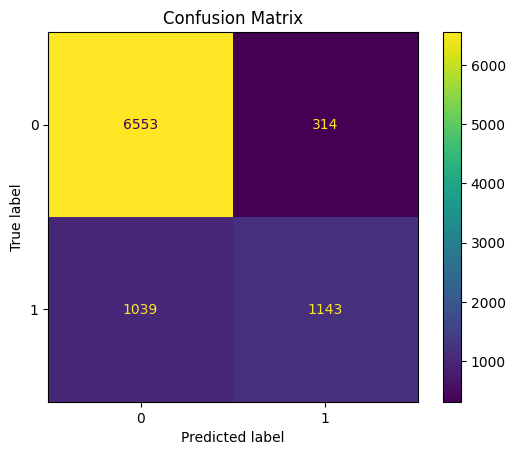

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(dt_default, X_test, y_test, cmap="viridis")

# Show the plot
plt.title("Confusion Matrix")
plt.show()

### Type I error - True Positives are 314, falsely predicted >=50k.
### Type II error - True Negatives are 1039, falsely predicted <=50k.

## Plotting The Decision tree

In [30]:
# Importing tree module from sklearn for visualization
from sklearn import tree

# Putting all feature names in a list
features = X.columns.tolist()  # Assuming X is a DataFrame with feature names

# Putting all classes in a list
cls = ['<=50K', '>50K']

In [31]:
# Printing feature names
print("Feature Names:")
print(features)

print("-----------------------------")

# Printing class names
print("Class Names:")
print(cls)


Feature Names:
['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
-----------------------------
Class Names:
['<=50K', '>50K']


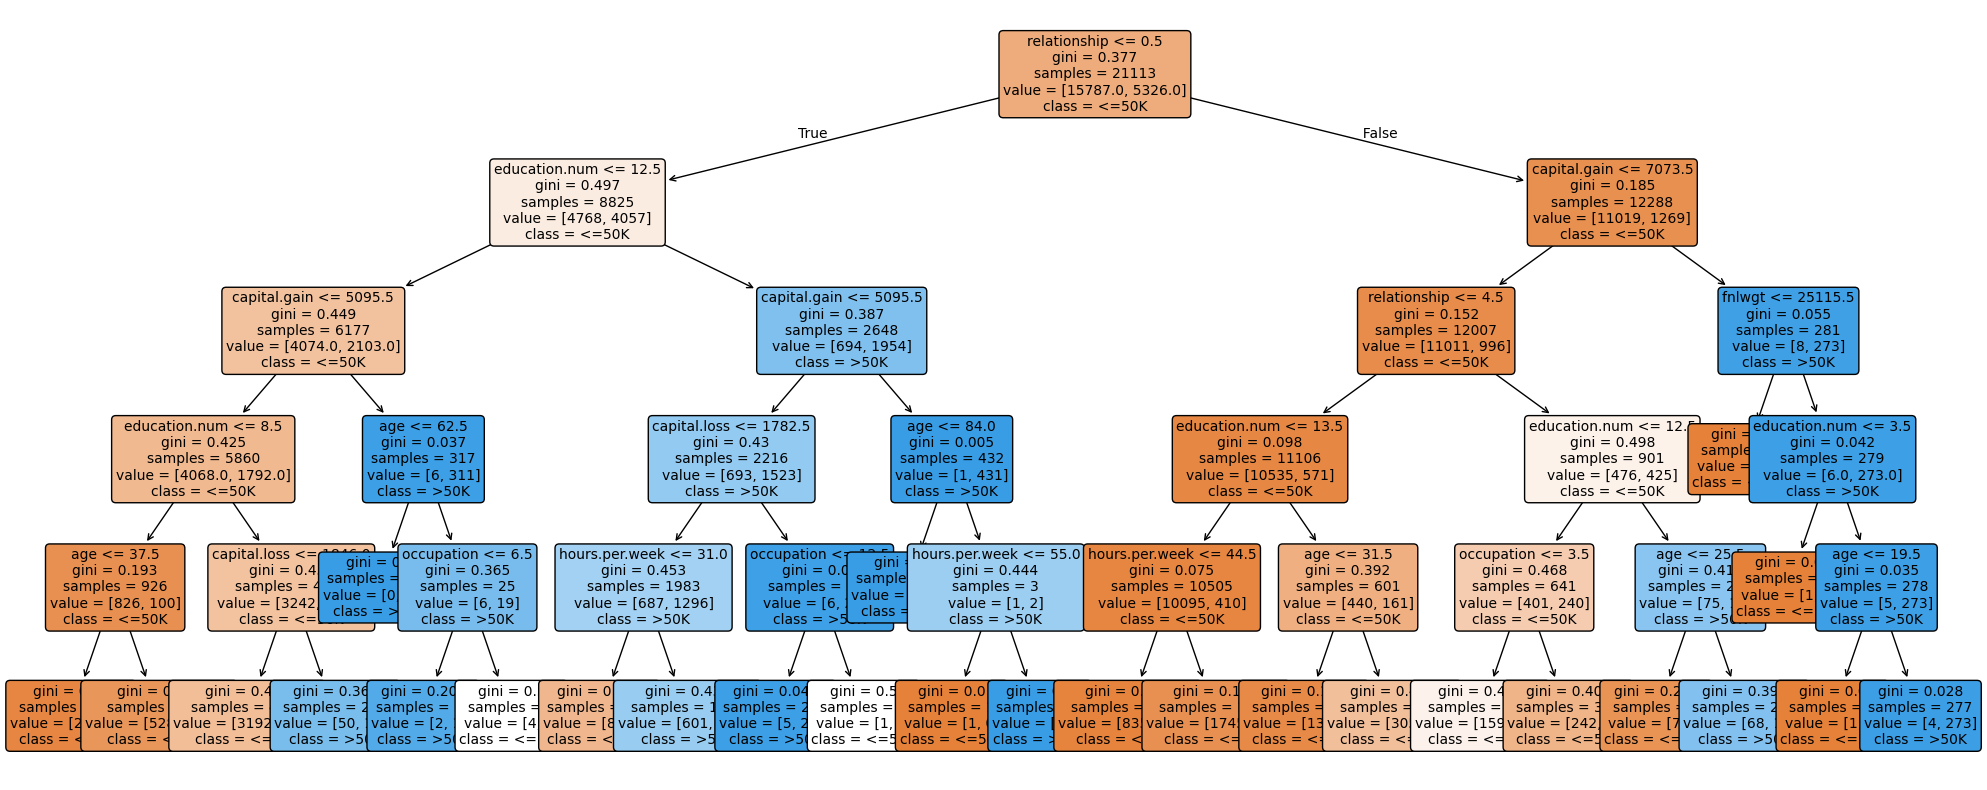

In [32]:
# Plotting the decision tree with max_depth=3
plt.figure(figsize=(25, 10))
plt.tight_layout()

# Creating the decision tree plot
a = tree.plot_tree(
    dt_default,  # Replace with your decision tree model
    feature_names=features,
    class_names=cls,
    filled=True,
    rounded=True,
    fontsize=10
)

# Display the plot
plt.show()


In [33]:
from sklearn.tree import export_text

# Generate the textual representation of the decision tree
text_representation = export_text(dt_default, feature_names=features)

# Print the textual representation
print(text_representation)

# Hyperparameter Tuning

In [34]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Specify the number of folds for k-fold CV (we are taking 5)
n_folds = 5

# Parameters to build the model on (max_depth range from 1 to 40)
parameters = {'max_depth': list(range(1, 41))}

# Instantiate the model (DecisionTreeClassifier) with criteria 'gini' and random_state as 100
dtree = DecisionTreeClassifier(criterion='gini', random_state=100)

# Instantiate GridSearchCV with above 3 parameters
# Scoring will be accuracy, and return_train_score will be True
tree = GridSearchCV(estimator=dtree, param_grid=parameters, cv=n_folds, scoring='accuracy', return_train_score=True)

# Fit the tree on training data
tree.fit(X_train, y_train)  # Replace X_train, y_train with your actual training data


|--- relationship <= 0.50
|   |--- education.num <= 12.50
|   |   |--- capital.gain <= 5095.50
|   |   |   |--- education.num <= 8.50
|   |   |   |   |--- age <= 37.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- age >  37.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- education.num >  8.50
|   |   |   |   |--- capital.loss <= 1846.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- capital.loss >  1846.00
|   |   |   |   |   |--- class: 1
|   |   |--- capital.gain >  5095.50
|   |   |   |--- age <= 62.50
|   |   |   |   |--- class: 1
|   |   |   |--- age >  62.50
|   |   |   |   |--- occupation <= 6.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- occupation >  6.50
|   |   |   |   |   |--- class: 0
|   |--- education.num >  12.50
|   |   |--- capital.gain <= 5095.50
|   |   |   |--- capital.loss <= 1782.50
|   |   |   |   |--- hours.per.week <= 31.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- hours.per.week >  31.00
|   |   |   |   |   |---

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...]},
             return_train_score=True, scoring='accuracy')

In [35]:
import pandas as pd

# Get the scores of GridSearchCV
scores = tree.cv_results_

# Convert the results into a DataFrame for easy viewing
scores_df = pd.DataFrame(scores)

scores_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.021266,0.006621,0.005145,0.000314,1,{'max_depth': 1},0.747810,0.747810,0.747573,0.747750,...,0.747738,0.000087,40,0.747721,0.747721,0.747780,0.747735,0.747735,0.747738,0.000022
1,0.030715,0.004243,0.006457,0.001515,2,{'max_depth': 2},0.812219,0.818612,0.820507,0.825675,...,0.819969,0.004538,16,0.821906,0.820308,0.819834,0.818542,0.819253,0.819969,0.001134
2,0.034053,0.008028,0.004666,0.000854,3,{'max_depth': 3},0.828558,0.834241,0.834478,0.836570,...,0.834273,0.003115,12,0.835998,0.834577,0.834458,0.833758,0.833758,0.834510,0.000819
3,0.031417,0.000437,0.003867,0.000071,4,{'max_depth': 4},0.832583,0.840871,0.842529,0.842729,...,0.840193,0.003860,9,0.841622,0.839491,0.844997,0.838908,0.845421,0.842088,0.002707
4,0.038159,0.002808,0.003785,0.000097,5,{'max_depth': 5},0.834241,0.844897,0.847265,0.842729,...,0.843319,0.004858,7,0.844287,0.844227,0.849319,0.841572,0.849683,0.845818,0.003165


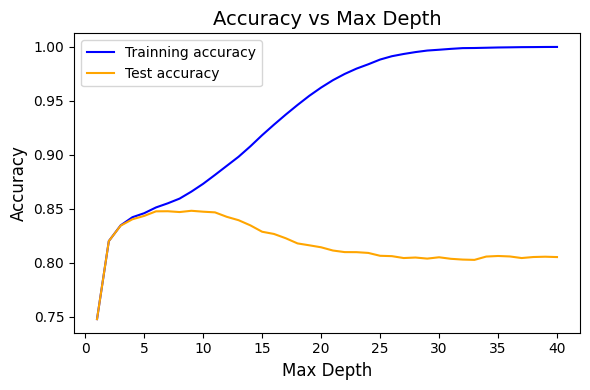

In [36]:
import matplotlib.pyplot as plt

max_depth_values = [param['max_depth'] for param in tree.cv_results_['params']]
mean_train_scores = tree.cv_results_['mean_train_score']
mean_test_scores = tree.cv_results_['mean_test_score']

plt.figure(figsize=(6, 4))

plt.plot(max_depth_values, mean_train_scores, label='Trainning accuracy', color='blue')
plt.plot(max_depth_values, mean_test_scores, label='Test accuracy', color='orange')

plt.title('Accuracy vs Max Depth', fontsize=14)
plt.xlabel('Max Depth', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()


## tunning min_samples_leaf

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

n_folds = 5

# Parameters to build the model on (min_samples_leaf with range 5 to 200 with a step of 20)
parameters = {'min_samples_leaf': list(range(5, 201, 20))}

dtree = DecisionTreeClassifier(random_state=100)

tree = GridSearchCV(estimator=dtree, param_grid=parameters, cv=n_folds, scoring='accuracy', return_train_score=True)

tree.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': [5, 25, 45, 65, 85, 105, 125, 145,
                                              165, 185]},
             return_train_score=True, scoring='accuracy')

In [38]:
scores = tree.cv_results_

scores_df = pd.DataFrame(scores)
scores_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.097251,0.005780,0.004306,0.000060,5,{'min_samples_leaf': 5},0.825716,0.827848,0.819560,0.826149,...,0.823616,0.003696,10,0.915335,0.911782,0.915335,0.912083,0.913149,0.913537,0.001537
1,0.077884,0.004177,0.004831,0.000823,25,{'min_samples_leaf': 25},0.841819,0.851291,0.839451,0.842018,...,0.844788,0.004651,6,0.868028,0.869686,0.871226,0.867503,0.869872,0.869263,0.001343
2,0.070678,0.004002,0.004271,0.000451,45,{'min_samples_leaf': 45},0.843003,0.849159,0.846555,0.851018,...,0.848293,0.003194,1,0.861042,0.860154,0.862581,0.860399,0.863714,0.861578,0.001362
3,0.065416,0.002100,0.004093,0.000087,65,{'min_samples_leaf': 65},0.841108,0.852711,0.845371,0.851492,...,0.845830,0.005589,2,0.857549,0.855773,0.858555,0.855189,0.858149,0.857043,0.001328
4,0.066154,0.005008,0.004793,0.001079,85,{'min_samples_leaf': 85},0.838030,0.849159,0.845371,0.851492,...,0.845214,0.004834,3,0.853108,0.853108,0.855654,0.854005,0.854597,0.854095,0.000963


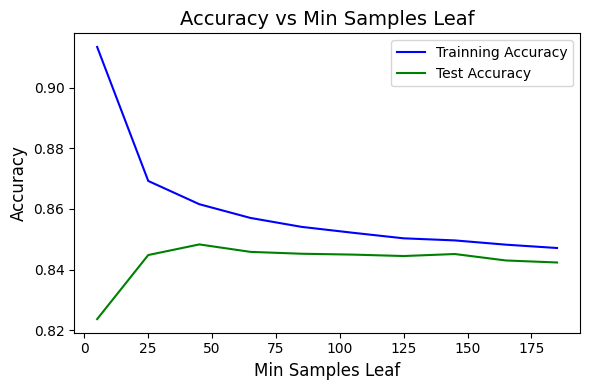

In [39]:
import matplotlib.pyplot as plt

min_samples_leaf_values = [param['min_samples_leaf'] for param in tree.cv_results_['params']]
mean_train_scores = tree.cv_results_['mean_train_score']
mean_test_scores = tree.cv_results_['mean_test_score']

plt.figure(figsize=(6, 4))

plt.plot(min_samples_leaf_values, mean_train_scores, label='Trainning Accuracy', color='blue')
plt.plot(min_samples_leaf_values, mean_test_scores, label='Test Accuracy', color='green')

plt.title('Accuracy vs Min Samples Leaf', fontsize=14)
plt.xlabel('Min Samples Leaf', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()


## Tunning Minimum sample split

In [40]:
n_folds = 5

parameters = {'min_samples_split': list(range(5, 201, 20))}
dtree = DecisionTreeClassifier(random_state=100)
tree = GridSearchCV(estimator=dtree, param_grid=parameters, cv=n_folds, scoring='accuracy', return_train_score=True)

tree.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': [5, 25, 45, 65, 85, 105, 125, 145,
                                               165, 185]},
             return_train_score=True, scoring='accuracy')

In [41]:
scores = tree.cv_results_
scores_df = pd.DataFrame(scores)

scores_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.109726,0.011908,0.004762,0.000506,5,{'min_samples_split': 5},0.811982,0.811035,0.818376,0.811701,...,0.812296,0.003296,10,0.969094,0.969331,0.969509,0.970458,0.971227,0.969924,0.000800
1,0.095797,0.003571,0.004393,0.000318,25,{'min_samples_split': 25},0.825006,0.825243,0.830215,0.822596,...,0.826126,0.002581,9,0.906927,0.906513,0.906986,0.906577,0.911847,0.907770,0.002047
2,0.090569,0.003758,0.004945,0.001521,45,{'min_samples_split': 45},0.835188,0.839687,0.830215,0.827333,...,0.834225,0.004783,8,0.890527,0.890053,0.889816,0.888521,0.896335,0.891051,0.002725
3,0.086255,0.001004,0.004655,0.000826,65,{'min_samples_split': 65},0.839451,0.845844,0.837556,0.833728,...,0.840098,0.004360,7,0.883896,0.882238,0.883245,0.880765,0.884258,0.882880,0.001261
4,0.084804,0.001376,0.004231,0.000213,85,{'min_samples_split': 85},0.846081,0.853895,0.838977,0.837281,...,0.844314,0.005898,6,0.877383,0.877442,0.879515,0.875081,0.880706,0.878025,0.001940


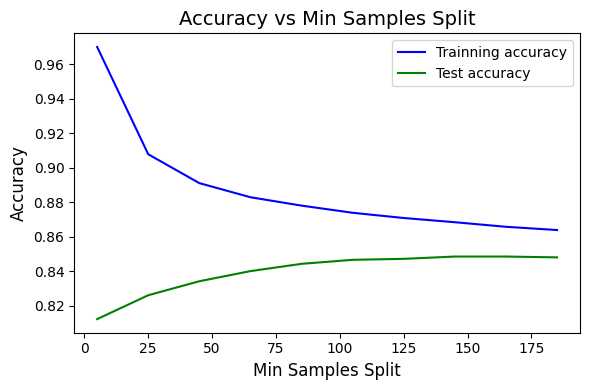

In [42]:
min_samples_split_values = [param['min_samples_split'] for param in tree.cv_results_['params']]
mean_train_scores = tree.cv_results_['mean_train_score']
mean_test_scores = tree.cv_results_['mean_test_score']

plt.figure(figsize=(6, 4))

plt.plot(min_samples_split_values, mean_train_scores, label='Trainning accuracy', color='blue')
plt.plot(min_samples_split_values, mean_test_scores, label='Test accuracy', color='green')

plt.title('Accuracy vs Min Samples Split', fontsize=14)
plt.xlabel('Min Samples Split', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()


# Grid Search to find optimal hyper-parameter

In [43]:
# the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

dtree = DecisionTreeClassifier(random_state=100)

grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=n_folds, scoring='accuracy', verbose=1)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='accuracy', verbose=1)

In [44]:
# Cv results in a data frame
cv_results = grid_search.cv_results_

cv_results_df = pd.DataFrame(cv_results)

cv_results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.049589,0.005876,0.004531,0.000479,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834241,0.843950,0.840398,0.845097,0.845334,0.841804,0.004173,13
1,0.044322,0.003193,0.004217,0.000660,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834241,0.843950,0.840398,0.845097,0.845334,0.841804,0.004173,13
2,0.041754,0.001403,0.003855,0.000161,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834241,0.842529,0.840398,0.845097,0.845808,0.841615,0.004157,15
3,0.040217,0.000522,0.003900,0.000242,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834241,0.842529,0.840398,0.845097,0.845808,0.841615,0.004157,15
4,0.065204,0.001415,0.003898,0.000135,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.842529,0.851527,0.847265,0.854334,0.853861,0.849903,0.004456,3


In [45]:
# Print the best accuracy score from GridSearchCV
print(f"Best Accuracy Score: {grid_search.best_score_}")

# Print the best hyperparameters and their corresponding values
print(f"Best Hyperparameters: {grid_search.best_params_}")

Best Accuracy Score: 0.8510400232064759
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}


### Running the model with the best parameter we got.

In [46]:
# Instantiate the model with optimal hyperparameters and random_state=100
clf_gini = DecisionTreeClassifier(
    random_state=100,
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    criterion=grid_search.best_params_['criterion']
)

clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [47]:
y_pred = clf_gini.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.850922753895458


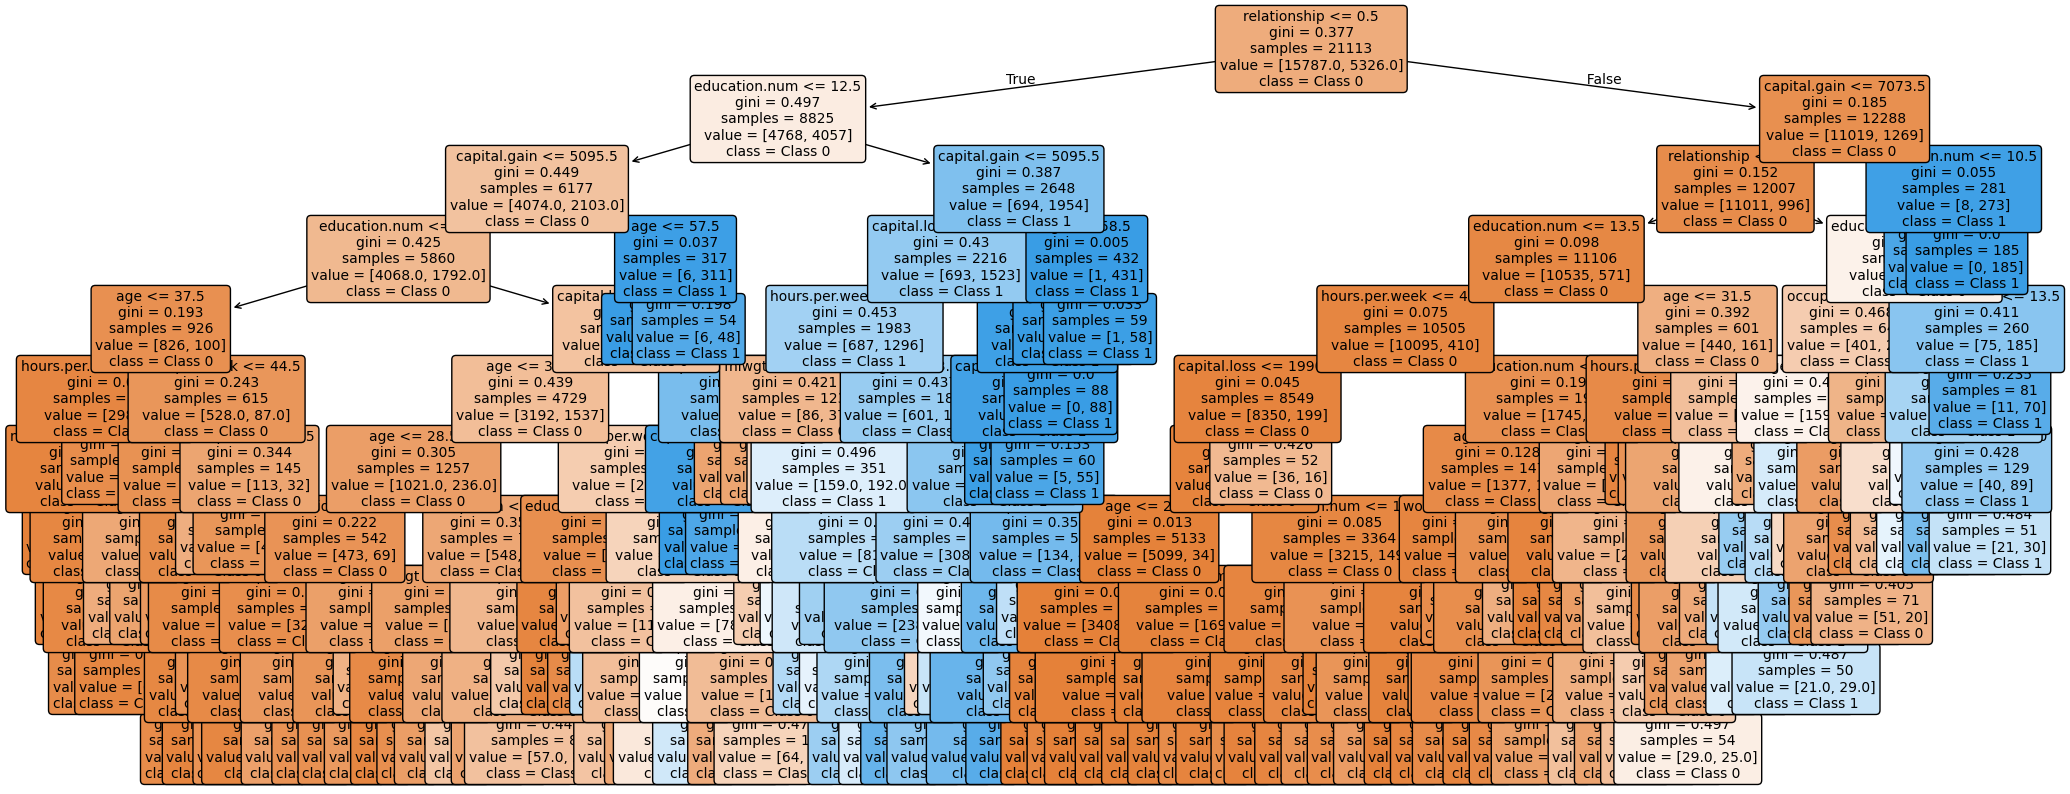

In [48]:
from sklearn import tree
plt.figure(figsize=(25, 10))
plt.tight_layout()

# Plot the trained decision tree
a = tree.plot_tree(
    clf_gini,  # The fitted model
    feature_names=X_train.columns,
    class_names=['Class 0', 'Class 1'],
    filled=True,  # Color the nodes based on the class distribution
    rounded=True,  # Round the corners of the nodes
    fontsize=10  # Adjust fontsize as needed
)

plt.show()

#### reducing the maximum depth of the tree

In [49]:
clf_gini = DecisionTreeClassifier(
    random_state=100,
    max_depth=3,
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],  # Use best min_samples_leaf from GridSearchCV
    min_samples_split=grid_search.best_params_['min_samples_split'],  # Use best min_samples_split from GridSearchCV
    criterion=grid_search.best_params_['criterion']  # Use the best criterion found from GridSearchCV
)

# Fit the model with the training data
clf_gini.fit(X_train, y_train)

# Print the model score (accuracy) on the training data
train_score = clf_gini.score(X_train, y_train)  # Training accuracy
test_score = clf_gini.score(X_test, y_test)  # Test accuracy

print(f"Training Accuracy: {train_score}")
print(f"Test Accuracy: {test_score}")


Training Accuracy: 0.8344148155165064
Test Accuracy: 0.8393192617968837


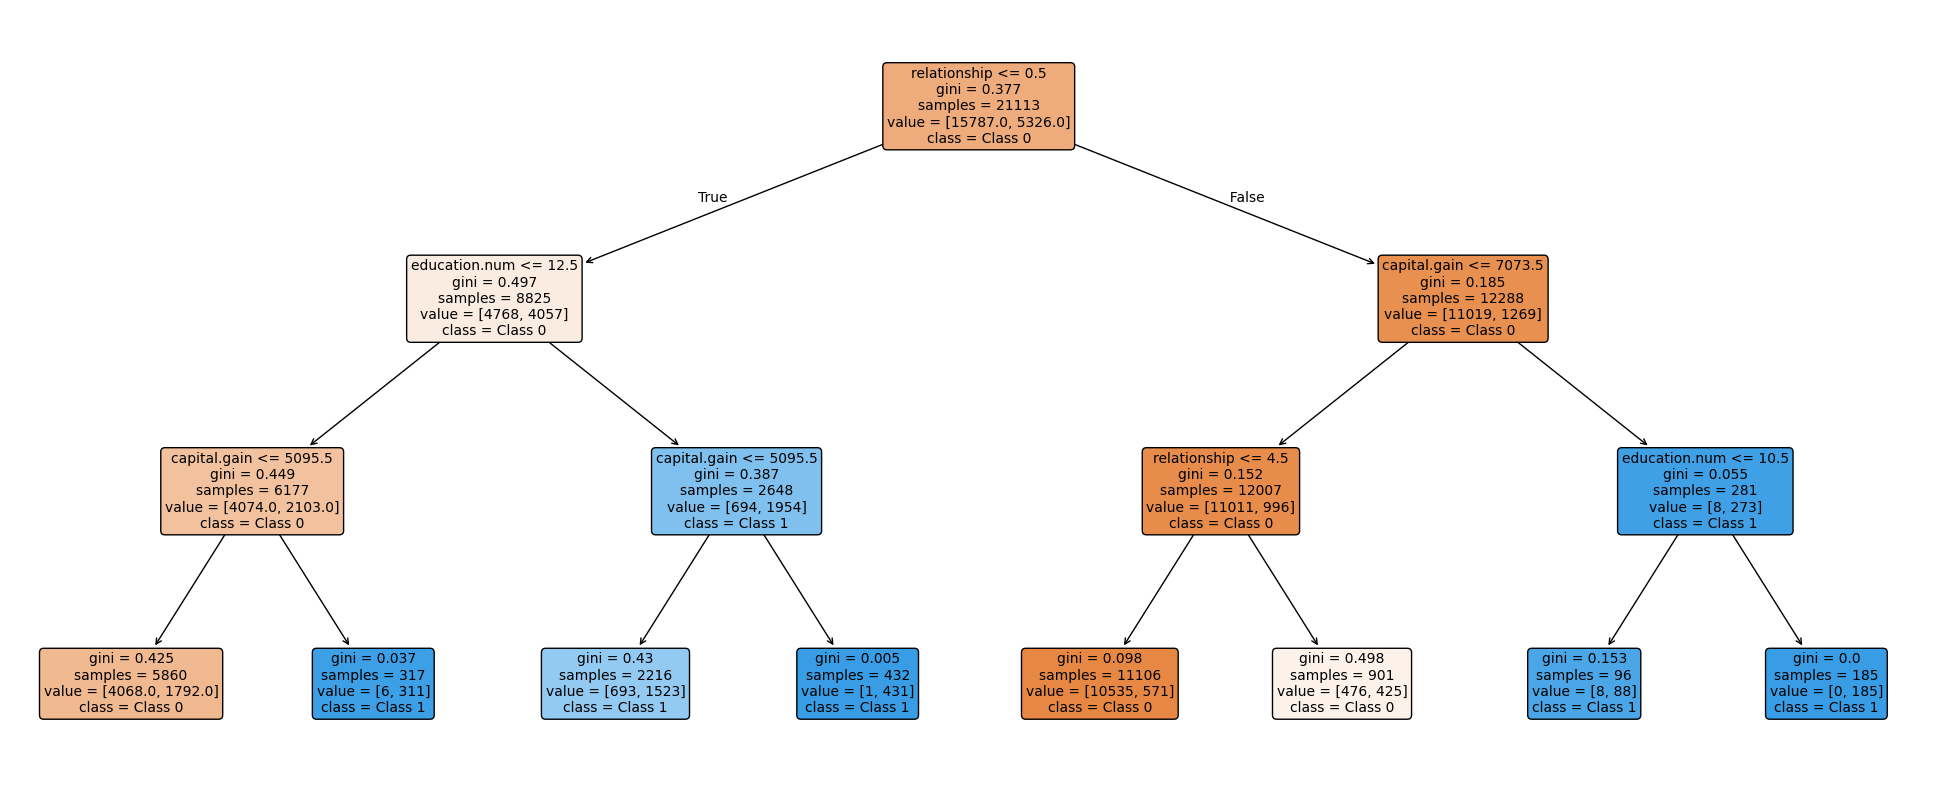

In [50]:
plt.figure(figsize=(25, 10))
plt.tight_layout()

a = tree.plot_tree(
    clf_gini,  # The trained decision tree model
    feature_names=X_train.columns,
    class_names=['Class 0', 'Class 1'],
    filled=True,  # Color nodes based on the class distribution
    rounded=True,  # Rounded corners for the nodes
    fontsize=10  # Font size for the labels
)

plt.show()

In [51]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6867
           1       0.73      0.60      0.66      2182

    accuracy                           0.85      9049
   macro avg       0.81      0.77      0.78      9049
weighted avg       0.84      0.85      0.85      9049



Confusion Matrix:
[[6383  484]
 [ 865 1317]]


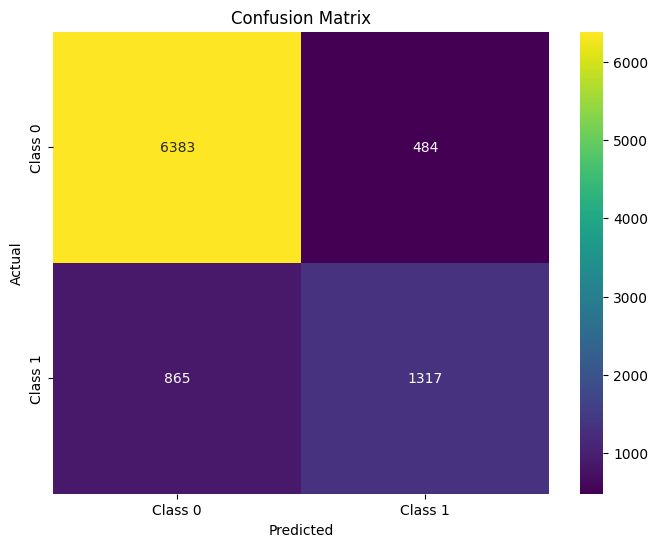

In [52]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Prunning in Decision Tree

In [56]:
pip install --upgrade scikit-learn

In [64]:
from sklearn.tree import DecisionTreeClassifier
 # clf_gini is decision_tree classifier instance
path = clf_gini.cost_complexity_pruning_path(X_train, y_train) ## Cost_complexity_prunning is a method in Decision Tree classifier.
ccp_alphas, impurities = path.ccp_alphas, path.impurities


In [65]:
print("CCP Alphas:", ccp_alphas)

CCP Alphas: [0.00000000e+00 4.15771003e-05 3.29981250e-03 1.29901716e-02
 1.39448764e-02 2.05367356e-02 2.77360949e-02 6.18175275e-02]


In [66]:
# Initialize empty lists for train and test accuracy
Accuracy_Train = []
Accuracy_Test = []

# Iterate over ccp_alpha
for ccp_alpha in ccp_alphas:

    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    Train_pred = clf.predict(X_train)

    Test_pred = clf.predict(X_test)

    Accuracy_Train.append(accuracy_score(y_train, Train_pred))

    Accuracy_Test.append(accuracy_score(y_test, Test_pred))


<Figure size 600x400 with 0 Axes>

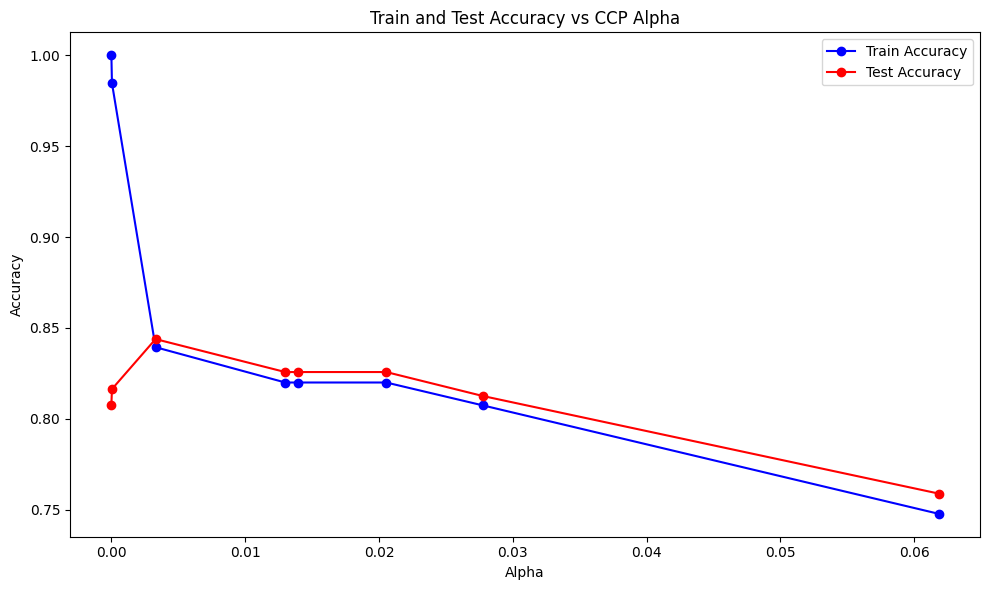

In [68]:
plt.figure(figsize=(6, 4))

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(ccp_alphas, Accuracy_Train, label="Train Accuracy", marker='o', color='blue')
ax.plot(ccp_alphas, Accuracy_Test, label="Test Accuracy", marker='o', color='red')

ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Train and Test Accuracy vs CCP Alpha")
ax.legend()

plt.tight_layout()
plt.show()


From the above plot, we can see that between first and second alpha values, we get the maximum test accuracy. Although our train accuracy has decreased to 0.8, our model is now more generalized and it will perform better on unseen data.

### Decision Tree with CCP alpha and GridSearch best parameters

##### #Set '0.01'  as ccp_alpha value in our final decision tree

In [77]:
final_dt = DecisionTreeClassifier(
    random_state=0,
    ccp_alpha=0.01,
    max_depth=10,
    min_samples_leaf=50,
    min_samples_split=50,
    criterion='gini'  # Use best parameters from grid search
)

final_dt.fit(X_train, y_train)

Train_pred = final_dt.predict(X_train)
Test_pred = final_dt.predict(X_test)

train_accuracy = accuracy_score(y_train, Train_pred)
test_accuracy = accuracy_score(y_test, Test_pred)

print(f"Final Training Accuracy: {train_accuracy:.4f}")
print(f"Final Testing Accuracy: {test_accuracy:.4f}")


Final Training Accuracy: 0.8344
Final Testing Accuracy: 0.8393


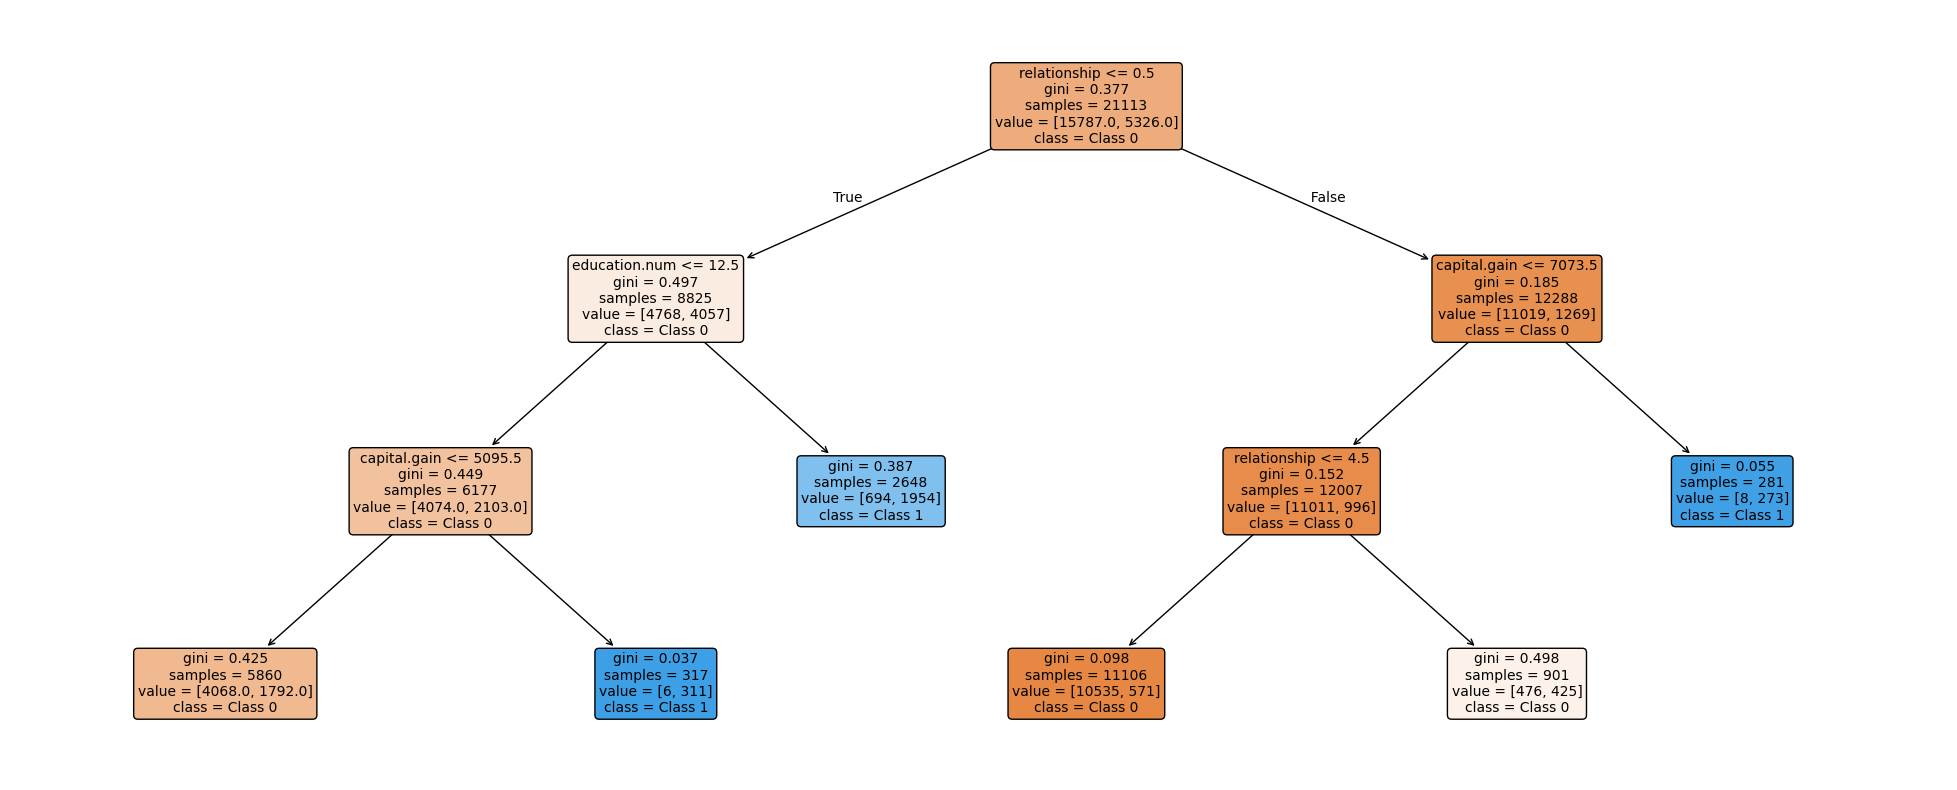

In [78]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(25, 10))
plt.tight_layout()

a = plot_tree(final_dt,
              feature_names=X_train.columns,  # assuming X_train is a DataFrame
              class_names=['Class 0', 'Class 1'],  # Update with your class names
              filled=True,
              rounded=True,
              fontsize=10)

# Display the plot
plt.show()